<CENTER>
<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=280, HEIGHT=200>

</br>
<p><font size="5"> TAF MCE</span></p>
<p><font size="4">  UE SMA </font></p>
<p></p>
<p><font size="5">  Mini-Project SMA </font></p>

**<p><font size="5">  Students NAME and FAMILY NAME: Mouad JALLOULI & Maher OUALI & Louis SANT'ANNA </font></p>**
</p></br>
</p>
</CENTER>

----------------------------

**Before starting:**

You need to install Basemap. You have to do it at each new session.

In [ ]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,222 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=12175

**Goal of this practice:**

The goal is to use a cloud computing platform (the Google Cloud Platform). We will use big data tools on Colab to process large datasets. These data are real satellite observations of the ocean (5 years).

**Evaluation of this practice:**

I will evaluate 3 main components.

The first is the quality of the code. It must be concise and well written. The goal is to manipulate big data tools provided by the Google Cloud Platform (such as BigQuery).

The second is the quality of the outputs. Never forget that you are dealing with physical variables evolving in space and time. You must use maps and time series. You must also write the units (e.g., °C, m).

The third thing is the discussion about your results. Again, remember that you are dealing with oceanographic data. They have a physical meaning and you should be able to comment the outputs.

**Import libraries:**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- scikit-learn (machine learning)
- pandas (data structures and data analysis tools)

In [ ]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
from matplotlib.dates import num2date, date2num
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


**Declare functions:**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)

In [ ]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,SST,line_type,var_name):

    # plot
    plot_date(time,SST,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

**The satellite database:**

In this practice, we use 5 years (2011-2015) of satellite observations of the global ocean. We use daily data with 25km spatial resolution. We study the Sea Surface Temperature (SST, in degrees) and the Sea Surface Height (SSH, in meters). SST and SSH are indexed in space (lon, lat) and time. The full database is stored in csv files and is quite large (~50Go).

**Part 1) Manipulation of a small dataset using pandas:**

We start to work on a small database (only the 10 first days in 2015, ~250Mo) and we will perform some basic statistics. The idea is to show that even if you use a small sample, basic data manipulation without big data tools is difficult, time and resource consuming.

After copying the dataset "data_sst_ssh_2015_small.csv" on your Colab environment, we read it using pandas (easy-to-use data structures and data analysis tools). We use the *groupby* and *mean* pandas functions to: map the global SST and SSH (using *plot_im*), plot the mean SST and SSH time series (using *plot_ts*).

In [ ]:
# read dataframe
data = pd.read_csv('data_sst_ssh_2015_small.csv', header=None, names=['lat', 'lon', 'sst', 'time', 'ssh'])
data.dropna(inplace=True)
data.head()

lat      lon  sst      time     ssh
0 -77.625  322.625 -1.8  735600.0 -1.2535
1 -77.375  319.625 -1.8  735600.0 -1.2179
2 -77.375  319.875 -1.8  735600.0 -1.2214
3 -77.375  320.125 -1.8  735600.0 -1.2247
4 -77.375  320.375 -1.8  735600.0 -1.2285

In [ ]:
# statistics of the dataset
data.describe()

lat           lon           sst          time           ssh
count  5.338142e+06  5.338142e+06  5.338142e+06  5.338142e+06  5.338142e+06
mean  -1.140249e+01  1.932643e+02  1.646711e+01  7.356045e+05  3.436659e-01
std    3.845649e+01  1.003294e+02  1.041889e+01  2.871928e+00  7.254869e-01
min   -7.762500e+01  1.250000e-01 -1.800000e+00  7.356000e+05 -1.520300e+00
25%   -4.462500e+01  1.123750e+02  6.450000e+00  7.356020e+05 -3.170000e-02
50%   -1.587500e+01  1.971250e+02  1.950000e+01  7.356050e+05  5.697000e-01
75%    1.737500e+01  2.733750e+02  2.595000e+01  7.356070e+05  8.530000e-01
max    8.437500e+01  3.598750e+02  3.345000e+01  7.356090e+05  1.898000e+00

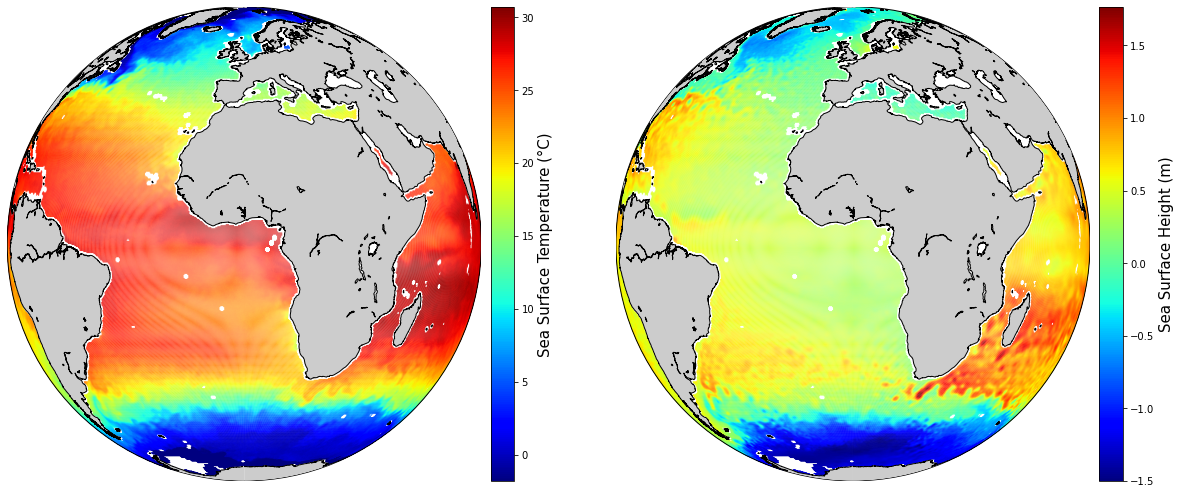

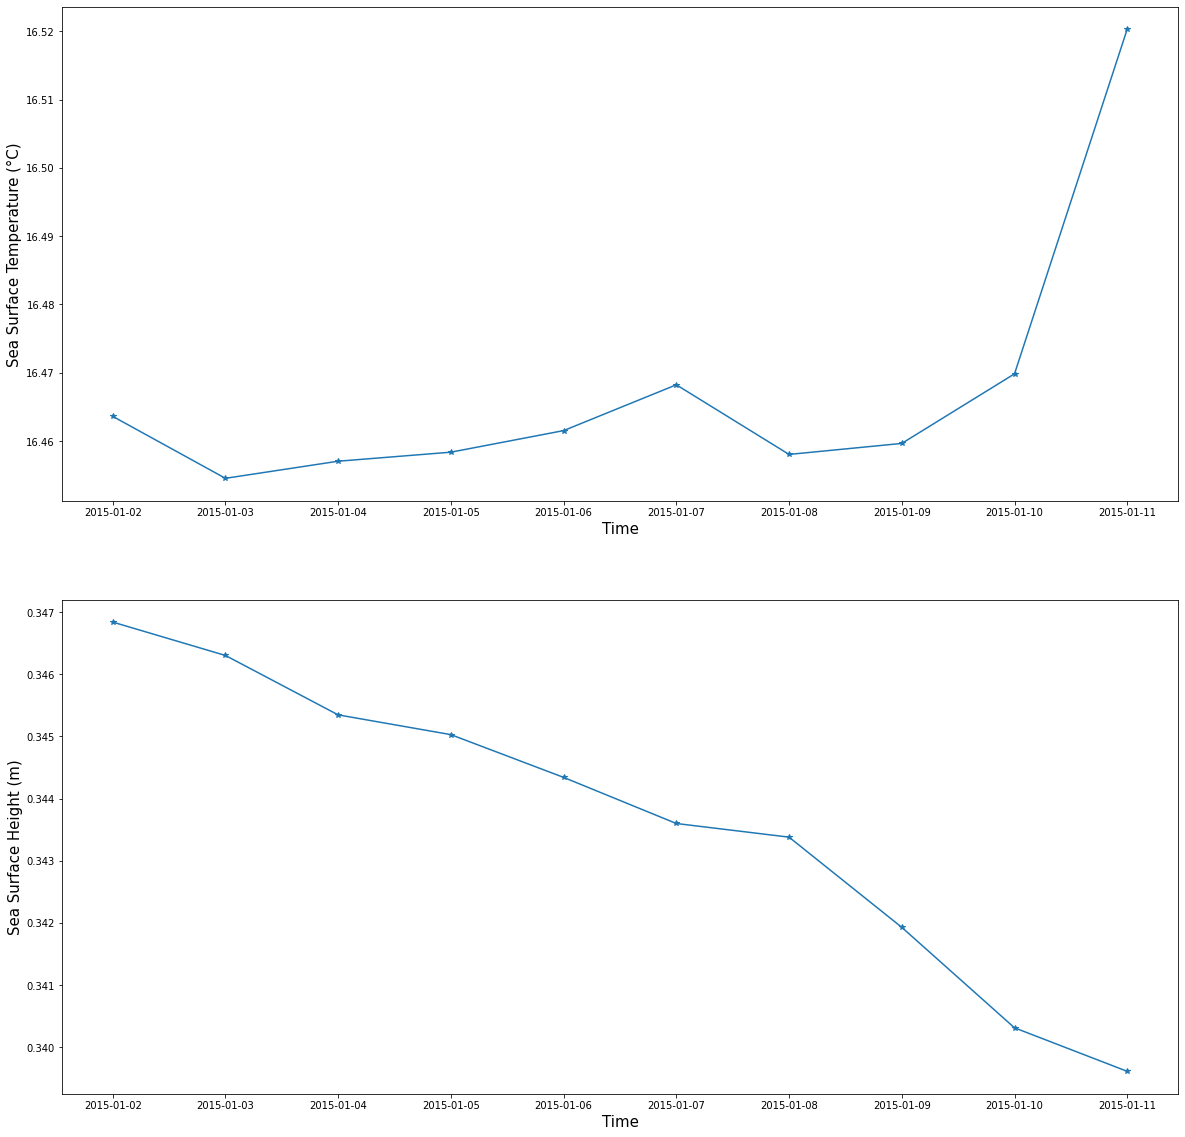

In [ ]:
# plot global SST and SSH maps
sst_im=data.groupby(['lon','lat'])['sst'].mean()
ssh_im=data.groupby(['lon','lat'])['ssh'].mean()
lon_im=data.groupby(['lon','lat'])['lon'].mean()
lat_im=data.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_im,lat_im,sst_im,1,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_im,lat_im,ssh_im,1,'Sea Surface Height (m)')

# plot global SST and SSH time series
sst_ts=data.groupby(['time'])['sst'].mean()
ssh_ts=data.groupby(['time'])['ssh'].mean()
time_ts=data.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_ts,sst_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_ts,ssh_ts,'-*','Sea Surface Height (m)')

**<font size=5><u>Comment:</u></font>**
* The **Sea Temperature** map shows a **coherent** distribution where areas which are closer to the <font color ="red">land </font>or the <font color ="red">equator </font>are hotter than those closer to the <font color ="blue">poles </font>whith a slightly **higher average** in the <font color ="red">Indian </font> ocean compared to the <font color ="blue">Atlantic </font> ocean.
* We notice based on both maps the existence of a positive correlation between **Sea Temperature** and **Sea Surface Height**. The **10 days** data conveys only a **local pattern** in the data but fails to capture the global positive correlation.

Now, we consider only a small region of the Globe: the Mediterranean Sea. As previously, we plot the mean time series and maps of SST and SSH. We also plot the SSH as a function of SST and the 2 distributions using histograms.

Text(0, 0.5, 'Sea Surface Height (m)')

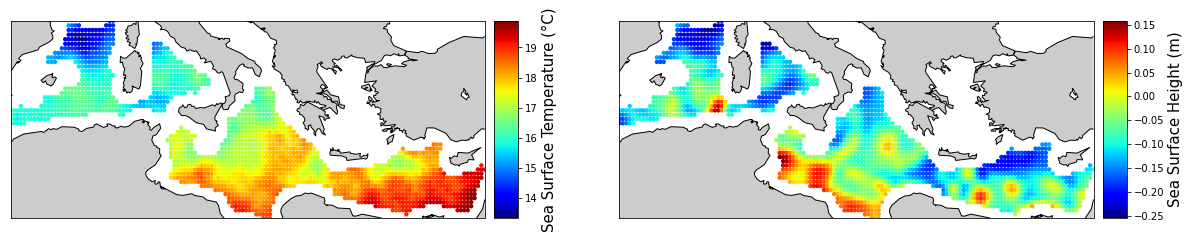

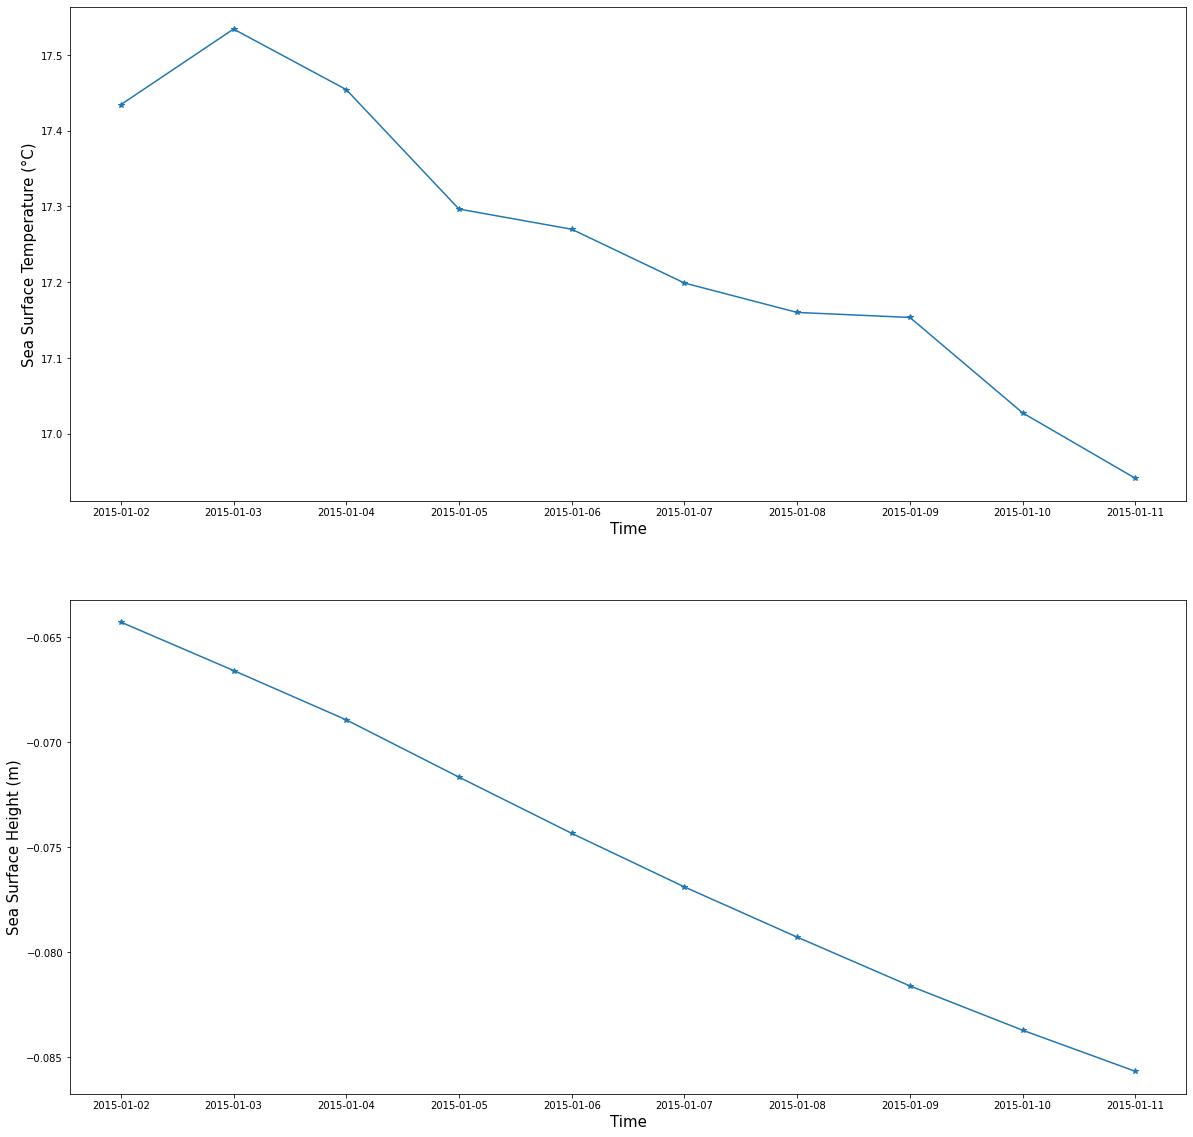

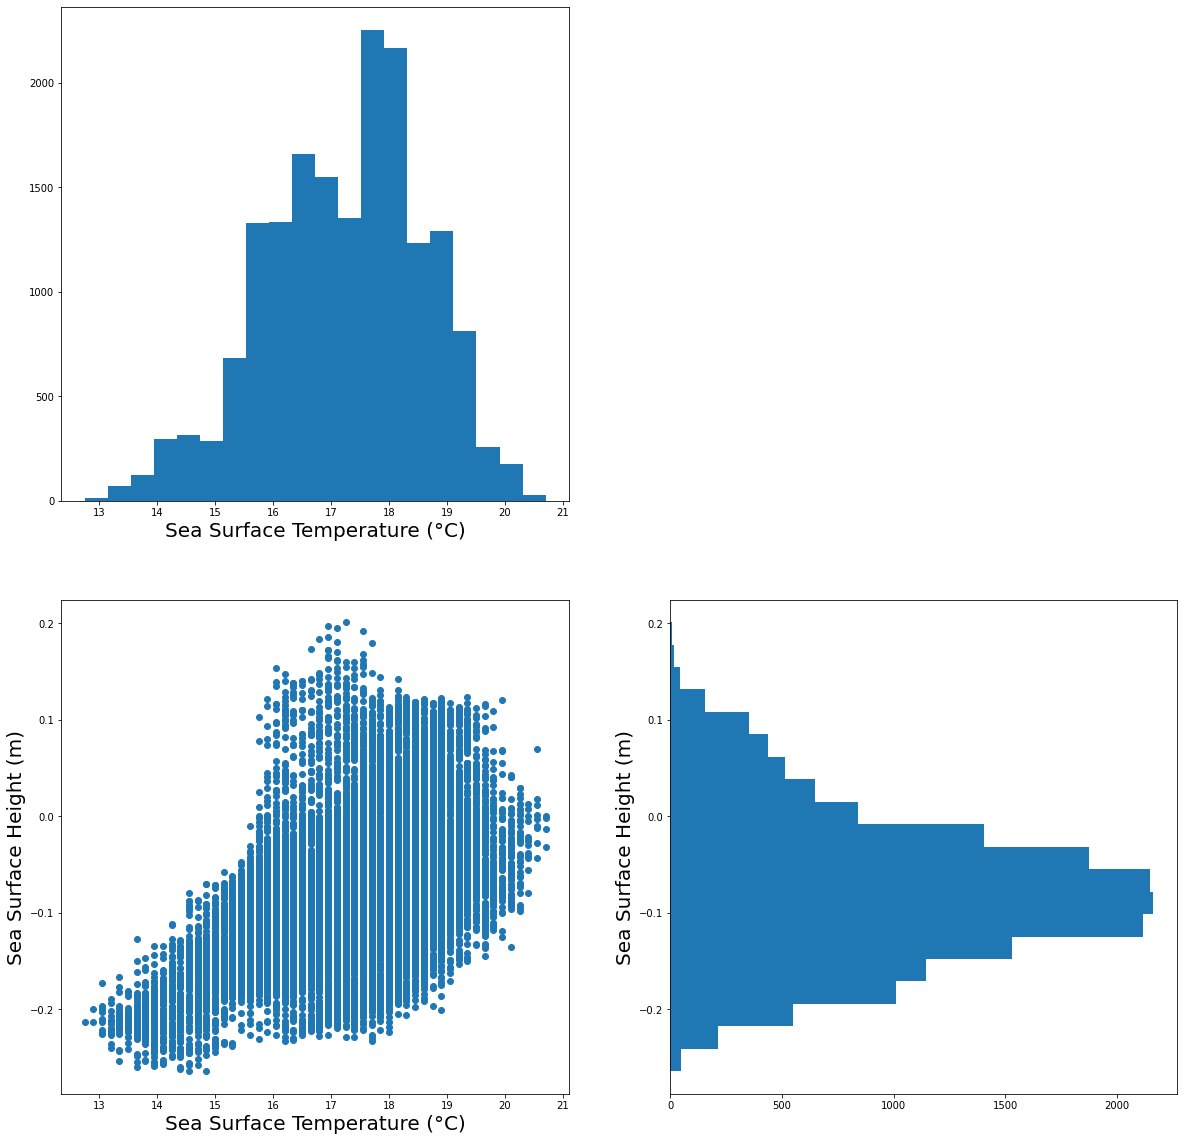

In [ ]:
# data selection
data_med=data[(data.lon>0) & (data.lon<35) & (data.lat>30) & (data.lat<45)]

# plot SST and SSH maps
sst_med_im=data_med.groupby(['lon','lat'])['sst'].mean()
ssh_med_im=data_med.groupby(['lon','lat'])['ssh'].mean()
lon_med_im=data_med.groupby(['lon','lat'])['lon'].mean()
lat_med_im=data_med.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_med_im,lat_med_im,sst_med_im,20,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_med_im,lat_med_im,ssh_med_im,20,'Sea Surface Height (m)')

# plot SST and SSH time series
sst_med_ts=data_med.groupby(['time'])['sst'].mean()
ssh_med_ts=data_med.groupby(['time'])['ssh'].mean()
time_med_ts=data_med.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_med_ts,sst_med_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_med_ts,ssh_med_ts,'-*','Sea Surface Height (m)')

# plot hist(SST), hist(SSH), SSH~SST
figure()
subplot(2,2,1)
hist(data_med.sst, 20)
xlabel('Sea Surface Temperature (°C)', size=20)
subplot(2,2,4)
hist(data_med.ssh, 20, orientation=u'horizontal')
ylabel('Sea Surface Height (m)', size=20)
subplot(2,2,3)
scatter(data_med.sst, data_med.ssh)
xlabel('Sea Surface Temperature (°C)', size=20)
ylabel('Sea Surface Height (m)', size=20)

**<font size=5><u>Comment:</u></font>**
* The Sea Temperature map shows us how<font color="red"> eastern</font> side of the Mediterranean Sea is hotter than the <font color="blue"> western</font> side because of the proximity of the latter to the Atlantic ocean near Morroco and to the Alpes moutains in the south of Europe.
* The graph of $ SSH=f(SST) $ shows that a priori **high** sea *surface temperature* is <u>a necesary but not sufficient condition</u> to get high sea *surface level*

**Remark:**

The dataset used above is small (250Mo) and corresponds only to 10 days. Now, we want to manipulate the full database of 5 years (50Go) using big data tools. This database is stored in the Google Cloud Platform.

**Part 2) Manipulation of the full database using BigQuery**

First, we have to connect to the Google Cloud Platform. using the following command. You will have to enter the login "bigdataocean2020@gmail.com" and password "bdoimt2020_mce". Do it only once.



In [ ]:
from google.colab import auth
auth.authenticate_user()

The Google Cloud Platform has set up a tool to handle large databases. This is called "BigQuery" and it is based on the NoSQL ("Not only SQL") language. The syntax in BigQuery is very similar to the pandas example given in Part 1). For instance, in the example below, we plot the mean SST map in the Mediterranean Sea over the period 2011-2015. The full 5-years dataset is stored in the BigQuery table *bdo2020.bdo2020.2011_2015*. The project is called *alert-ground-261008* (strange but you have to provide it). The result of the BigQuery request is stored in the *output* dataframe. 

In [ ]:
%%bigquery --project alert-ground-261008 mediterranean_data
SELECT lon, lat,time, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45
GROUP BY lon, lat, time

In [ ]:
# sample of the dataframe
mediterranean_data.head()

lon     lat      time  mean_sst
0   7.375  42.625  735232.0     14.40
1  19.125  31.625  735232.0     20.10
2   4.375  42.625  735224.0     14.55
3   7.125  42.625  735224.0     15.45
4  18.875  31.625  735224.0     20.55

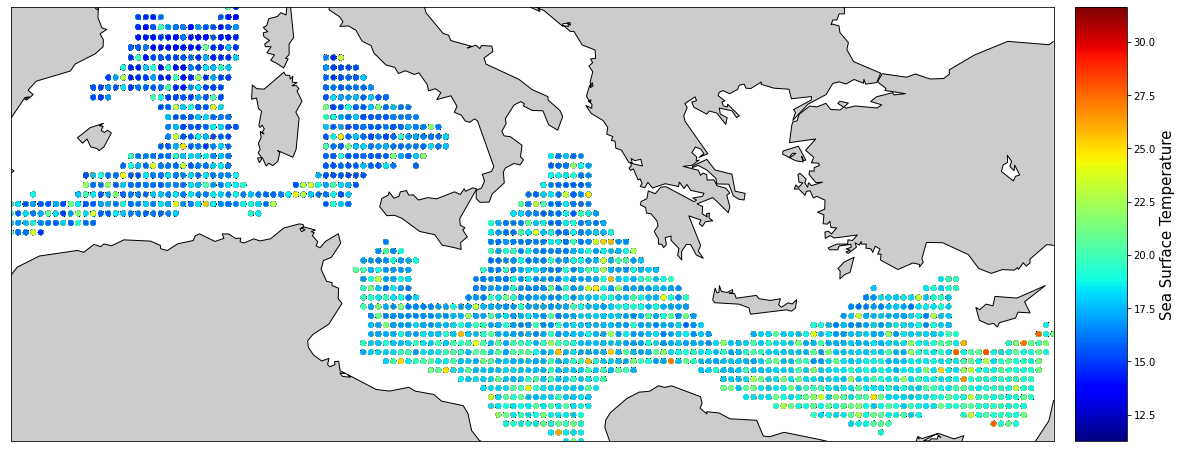

In [ ]:
plot_im(mediterranean_data.lon, mediterranean_data.lat, mediterranean_data.mean_sst,30,'Sea Surface Temperature')

SQL language is suitable to manipulate and compute basic statistics such as the mean, standard deviation, minimum, maximum, correlation, etc... Here you will find the list of basic functions: https://cloud.google.com/bigquery/docs/reference/legacy-sql?hl=fr.

It is also possible to use Machine Learning algorithms inside BigQuery. Here you will find a complete description of the possibilities: https://cloud.google.com/bigquery-ml/docs/bigqueryml-intro?hl=fr. Another solution (easiest way of doing) is to extract a small amount of data in BigQuery and then use scikit-learn: https://scikit-learn.org/stable/.

**Important note:** the tables stored in the Google Cloud Platform are not chronologically ordered. When dealing with time series, you will thus have to use *ORDER BY time* in your BigQuery requests.

**QUESTION 1**: Compute and plot the correlation map over the period 2011-2015 between SST and SSH in the Agulhas current, between longitudes (+15,+70) and latitudes (-50,-30).

In [ ]:
%%bigquery --project alert-ground-261008 agulhas_data
SELECT lon, lat, corr(sst, ssh) AS corr_sst_ssh
FROM bdo2020.bdo2020.2011_2015
WHERE lon>15 AND lon<70 AND lat>-50 AND lat<-30
GROUP BY lon, lat

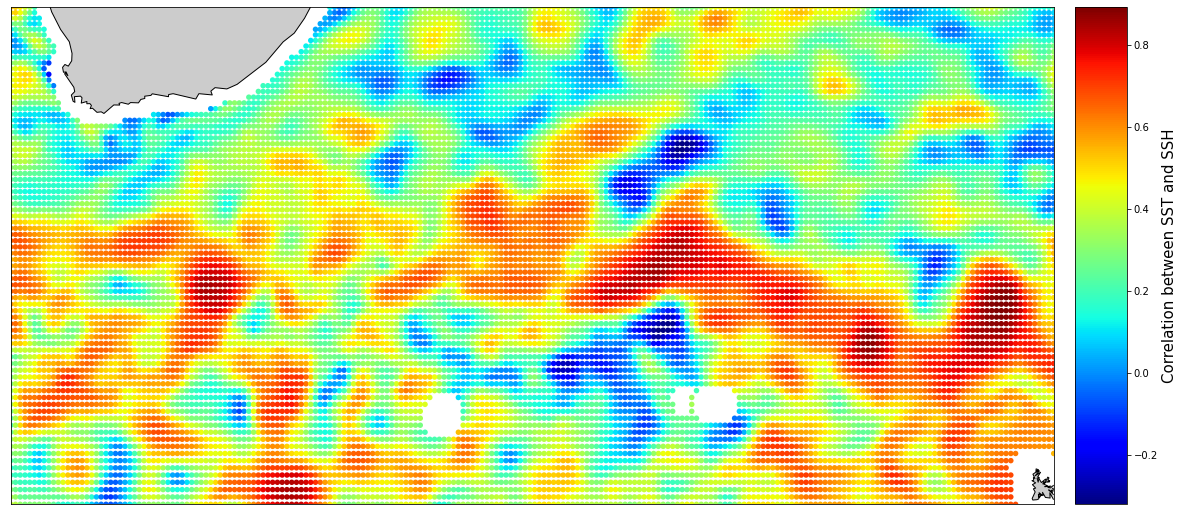

In [ ]:
plot_im(agulhas_data.lon, agulhas_data.lat, agulhas_data.corr_sst_ssh,30,'Correlation between SST and SSH')

**<font size=5><u>Comment:</u></font>**

The Agulhas current is **one of the fastest-flowing currents** in any ocean, it's located in the **south western** side of the **Indian** Ocean and it defines the edge between two oceans.

It's known as a **warm** area (Temperature ranging between <font color="red">14 to 26 °C </font>at the surface) and this map shows us that there's, in average, a **correlation** between *SSH* and *SST* in that region. This is coherent with the phenomenon of **thermal expansion** i.e the expanding of water as it warms. Besides due to **climate change** (*global warming*) , we've noticed a rise of **ice-land melting** (Southern pole)

**QUESTION 2**: Plot the daily mean and standard deviation time series of SST for the period 2011-2015 in the Equatorial Pacific, between longitudes (+180,+300) and latitudes (-20,+20). The mean SST time series is called the ENSO index and is used to identify El Nino and La Nina events.

In [ ]:
%%bigquery --project alert-ground-261008 equatorial_pacific_data
SELECT time, AVG(sst) AS mean_sst, STDDEV(sst) AS std_sst, 
FROM bdo2020.bdo2020.2011_2015
WHERE lon>180 AND lon<300 AND lat>-20 AND lat<20
GROUP BY time
ORDER BY time

In [ ]:
equatorial_pacific_data.head()

time   mean_sst   std_sst
0  734138.0  25.122176  2.009131
1  734139.0  25.159626  1.976392
2  734140.0  25.178380  1.958183
3  734141.0  25.180295  1.936266
4  734142.0  25.184382  1.925013

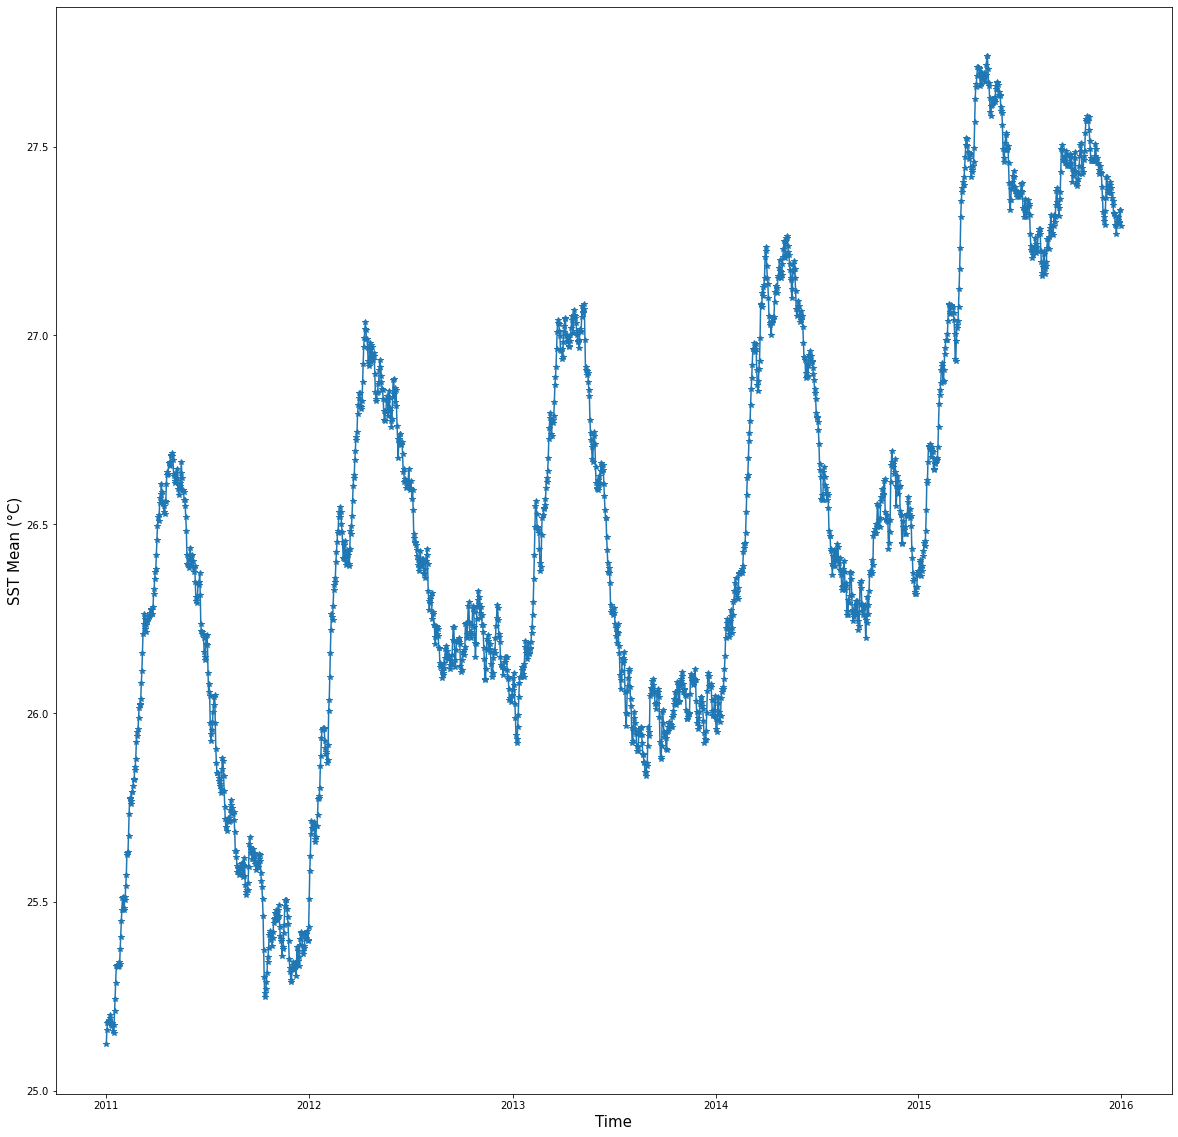

In [ ]:
plot_ts(equatorial_pacific_data.time, equatorial_pacific_data.mean_sst,'-*','SST Mean (°C)')

**<font size=5><u>Comment:</u></font>**

In the data above describing the daily mean Sea Surface Temperature, we notice two main patterns:
* *Seasonality pattern*: Its period is of **one year** with a **rise** in the middle of the year and a **fall** at the end of the year which is equivalent to the **four seasons** (winter, spring, summer, automn)
* *Tendancy pattern*: There has been a **gradual rise** over the years in the mean annual SSH, this might be due to **climate change** in earth affecting thus the Pacific ocean Temperature

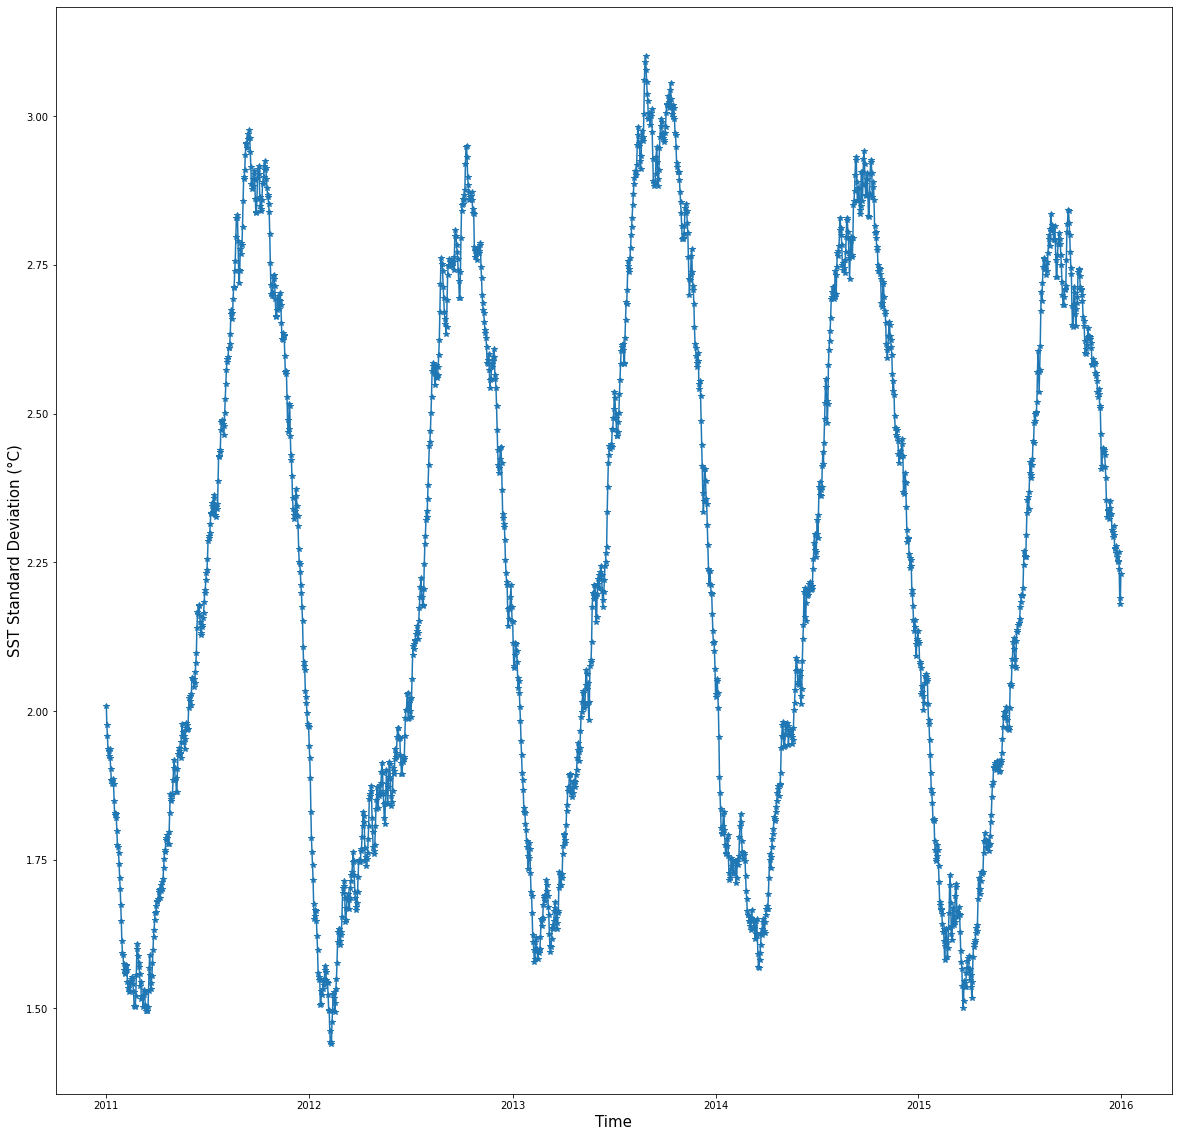

In [ ]:
plot_ts(equatorial_pacific_data.time, equatorial_pacific_data.std_sst,'-*','SST Standard Deviation (°C)')

**<font size=5><u>Comment:</u></font>**

We notice that the standard deviation (std) of SST is **periodic** as well with a period of **one year**, in fact, the std is **higher in the hot season** which might be due to the larger interval of temperatures being measured in the area.

**QUESTION 3**: Compute the dealy time series of SST over the period 2011-2015 in the Gulf of Mexico, between longitudes (+263,+281) and latitudes (+17,+35). In this region, there are a lot of hurricanes and they use the energy of the sea (hot waters) to get stronger. Thus, after a hurricane, we see a rapid decrease of the SST. Plot the time series of the difference of SST between 2 consecutive days and check that the negative peaks (below -0.4°C) correspond to well known hurricanes.


In [ ]:
%%bigquery --project alert-ground-261008 mexico_gulf_data
SELECT time, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>263 AND lon<281 AND lat>17 AND lat<53
GROUP BY time
ORDER BY time

In [ ]:
mexico_gulf_data['diff'] = mexico_gulf_data.mean_sst - mexico_gulf_data.mean_sst.shift()

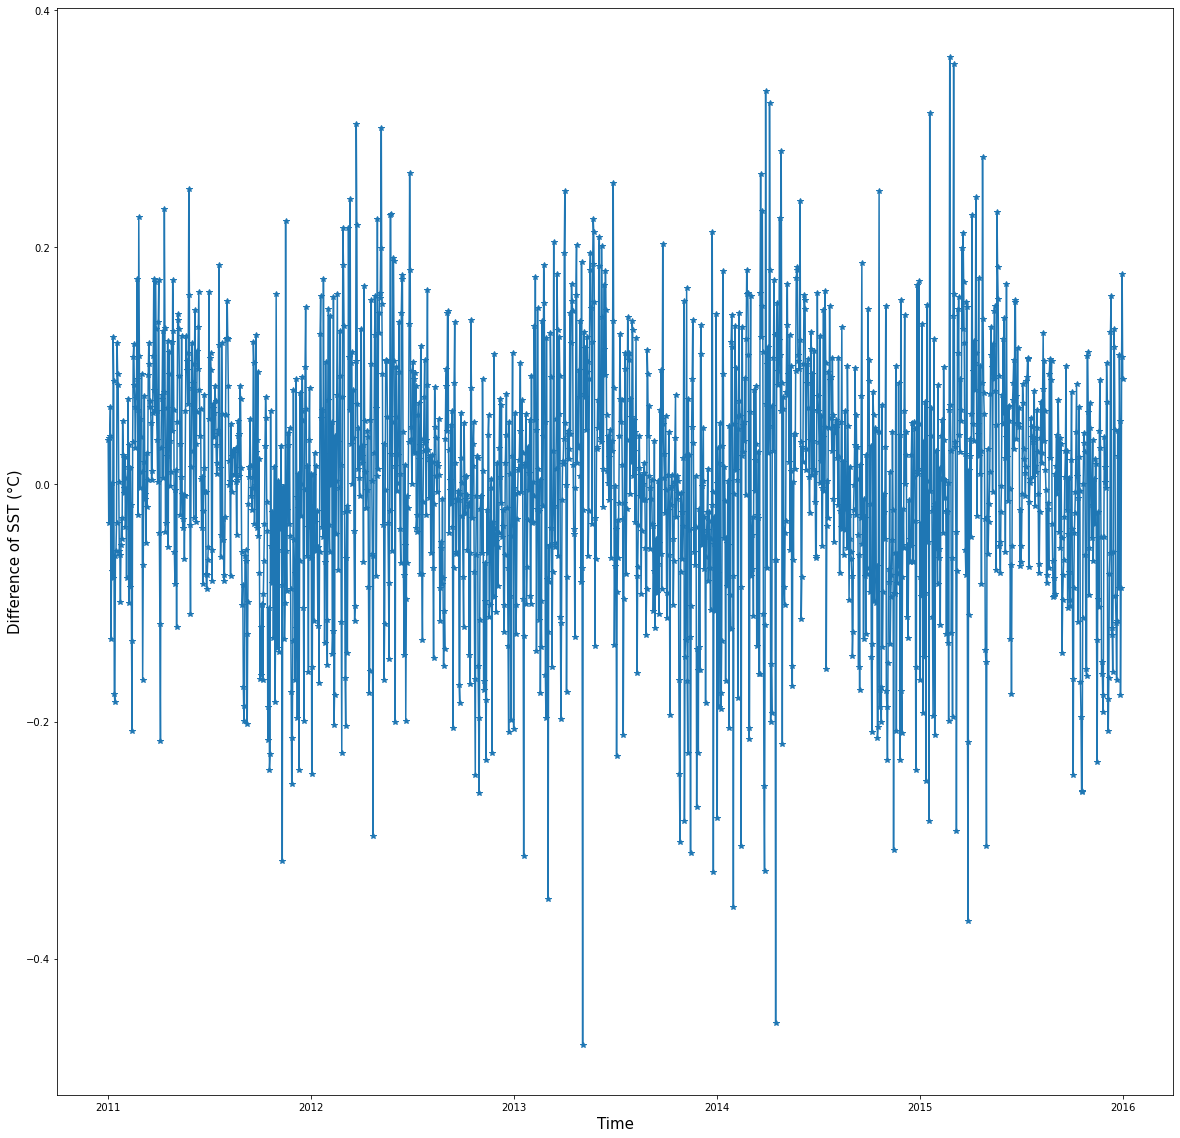

In [ ]:
plot_ts(mexico_gulf_data.time, mexico_gulf_data['diff'],'-*',"Difference of SST (°C)")

In [ ]:
#determine the dates of known hurricanes
df_huuricane = mexico_gulf_data[mexico_gulf_data['diff'] <= -.4]
df_huuricane.time = df_huuricane.time.apply(lambda x :num2date(x))
df_huuricane

time   mean_sst      diff
854  2013-05-04 00:00:00+00:00  25.134198 -0.473209
1201 2014-04-16 00:00:00+00:00  24.586088 -0.454286

**<font size=5><u>Comment:</u></font>**

We were able to locate two events corresponding to known hurricanes:
* *4 May 2013*: This event is related to **Andrea Storm** occurring at the beginning of June 2013 touching the following areas [Yucatán Peninsula, Cuba, Eastern United States, Atlantic Canada]
* 16 Avril 2014: This event matches **Arthur Storm** occurring in 2014 touching [The Bahamas, East Coast of the United States (North Carolina), Atlantic Canada (Nova Scotia)] causing damages exceeding 40M$

**Part 3) Combination of BigQuery and scikit-learn**

Now, we will extract data using BigQuery and apply regressions (using scikit-learn) on these extracted data. 

Note that there is another way to use machine learning algorithms (like the linear regression) in BigQuery, but this solution is difficult to implement: I suggest to use the classic one (i.e., using scikit-learn).

**QUESTION 4**: Model the daily mean SST in the Mediterranean Sea using a linear tendancy and a one-year seasonal cycle such that: $SST(t)=\alpha_0 + \alpha_1 t + \alpha_2 sin(2\pi\omega t) + \alpha_3 cos(2\pi\omega t)$, with $\omega=\frac{1}{365}$. Then, plot the raw time series and the one produced by the model. Finally, plot the autocorrelation function of the residuals (difference between the raw time series and the estimation made by the model).

In [ ]:
%%bigquery --project alert-ground-261008 mediterranean_sea_data
SELECT time, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45
GROUP BY time
ORDER BY time

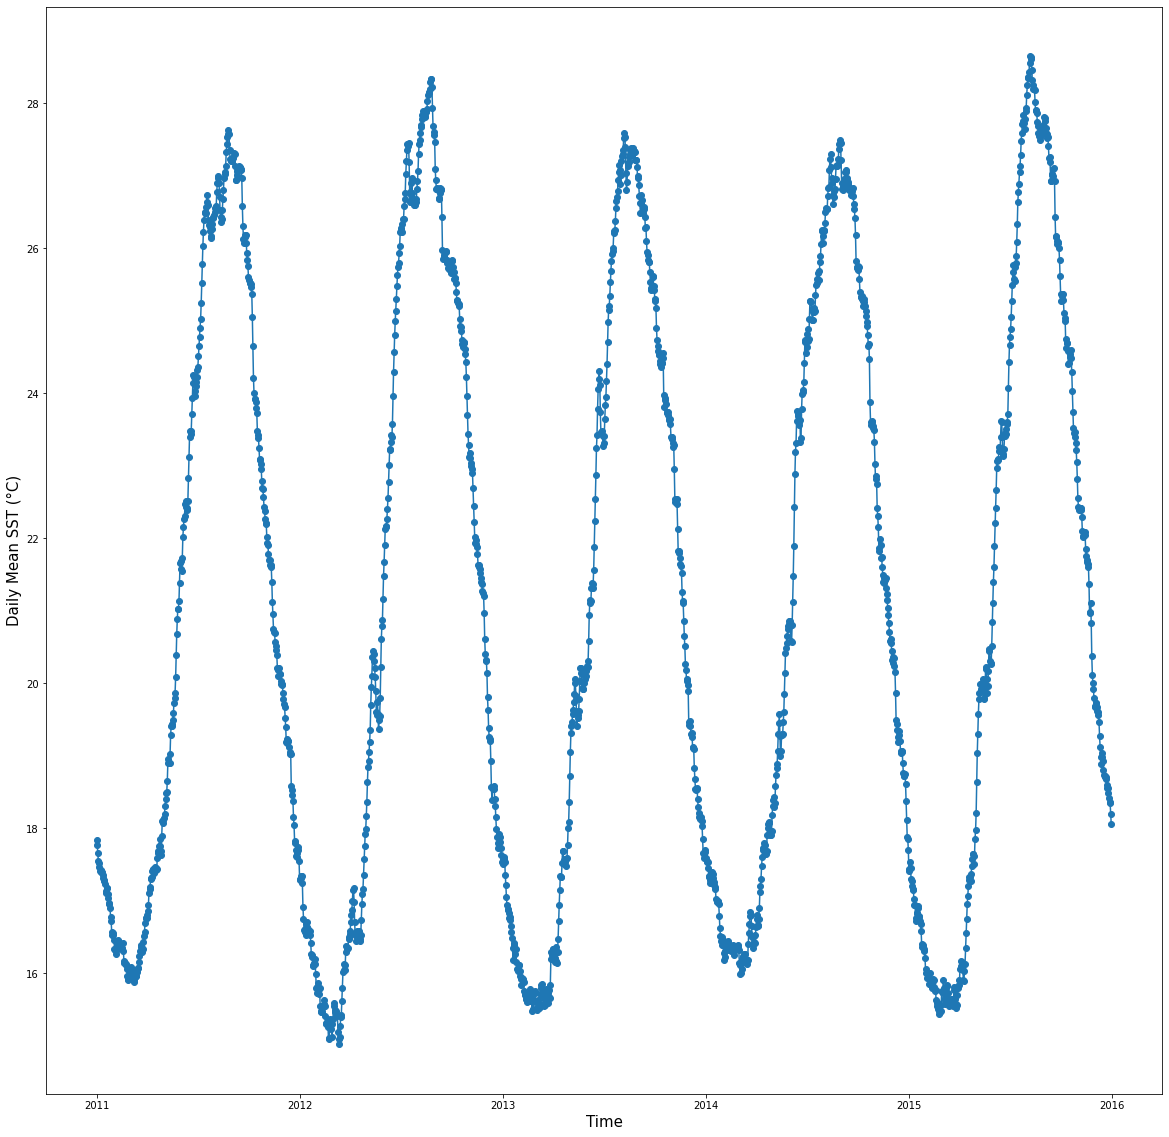

In [ ]:
plot_ts(mediterranean_sea_data.time, mediterranean_sea_data.mean_sst,'-o',"Daily Mean SST (°C)")

In [ ]:
#create features
time = mediterranean_sea_data.time.values.reshape(-1,1)
sst = mediterranean_sea_data.mean_sst.values.reshape(-1,1)
cos_time = np.cos(2*np.pi*(1/365)*time)
sin_time = np.sin(2*np.pi*(1/365)*time)
time_features = np.c_[time,cos_time,sin_time]
#fit model
reg = LinearRegression().fit(time_features, sst)
print("SST(t)= {} + {} * t + {} * sin(2πωt) + {} * cos(2πωt)".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

SST(t)= 13.08540409791399 + 1.0965290998984531e-05 * t + 5.815840474796313 * sin(2πωt) + -0.5822129523824735 * cos(2πωt)


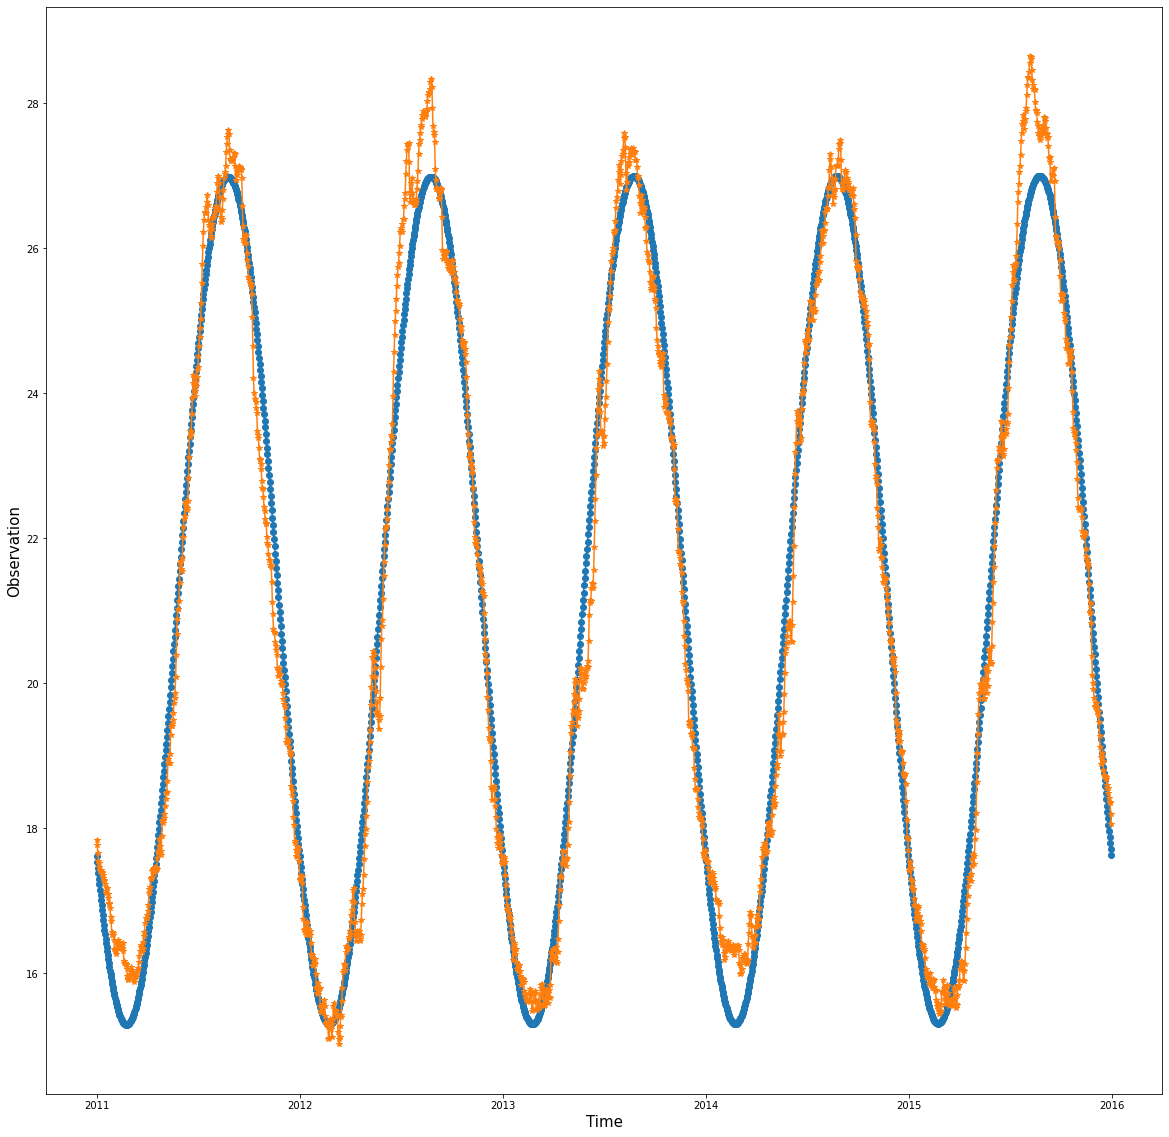

In [ ]:
sst_pred = reg.predict(time_features)
plot_ts(time,sst_pred,'-o',"Regression")
plot_ts(time,sst,'-*',"Observation")

**<font size=5><u>Comment:</u></font>**

We notice that our linear regression **fits very well** the data **visually speaking**. As well, the slope of the linear tendancy is very close to zero indicating a **negligeable rise** over time.

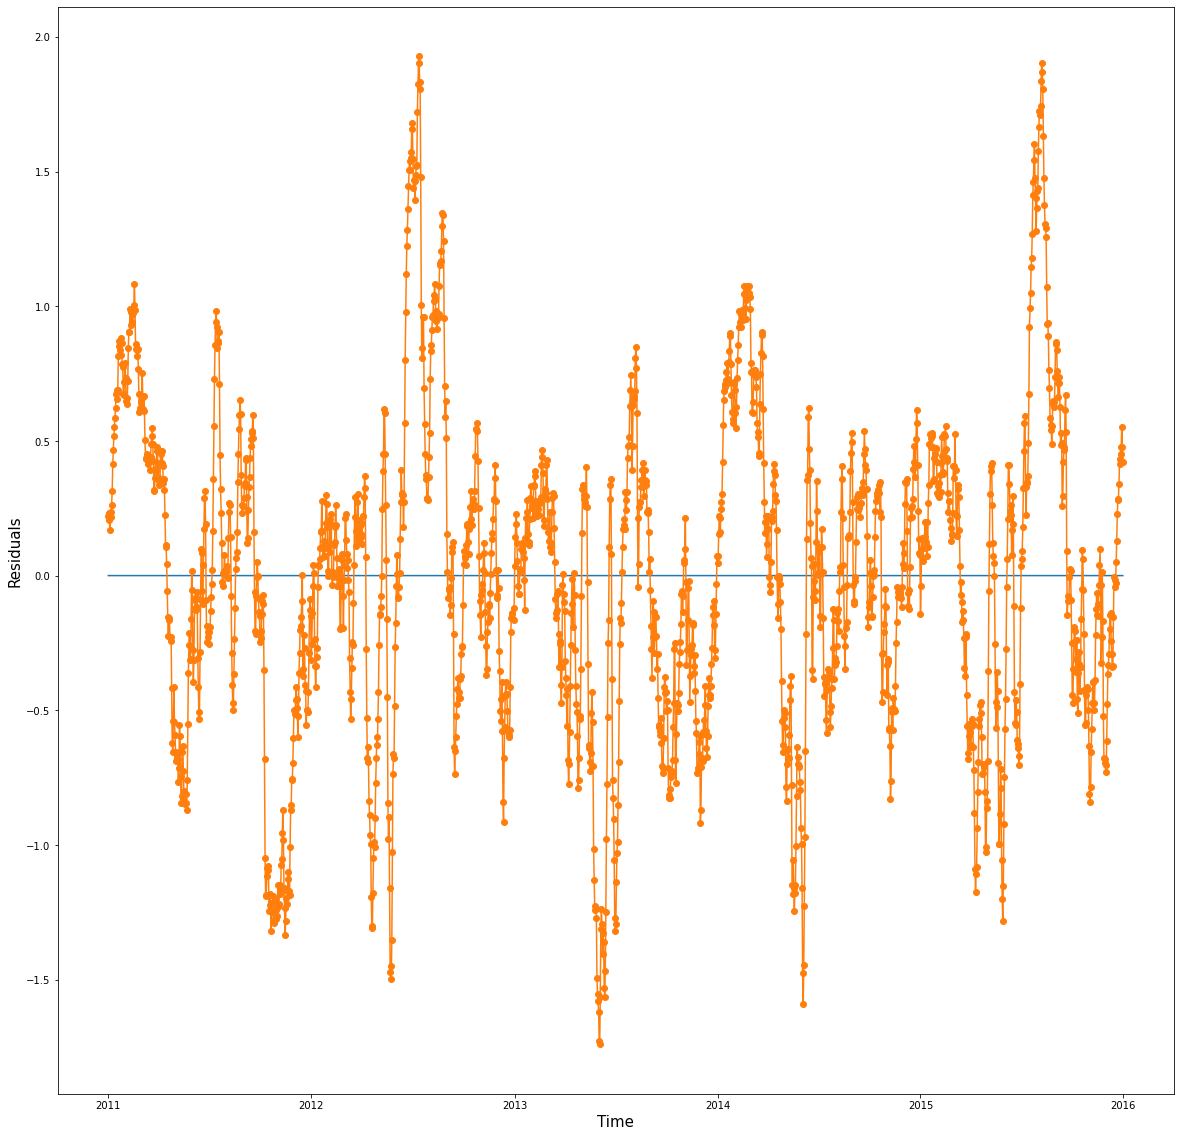

In [ ]:
residuals = sst - sst_pred
plot_ts(time,np.zeros(len(time)),"-","")
plot_ts(time,residuals,"-o","Residuals")

In [ ]:
print("The mean of the residuals and their variance are respectively {},  {}".format(np.mean(residuals),np.std(residuals)))

The mean of the residuals and their variance are respectively 4.9817762182741965e-15,  0.6065765033801018


Text(0, 0.5, 'Correlation Coef')

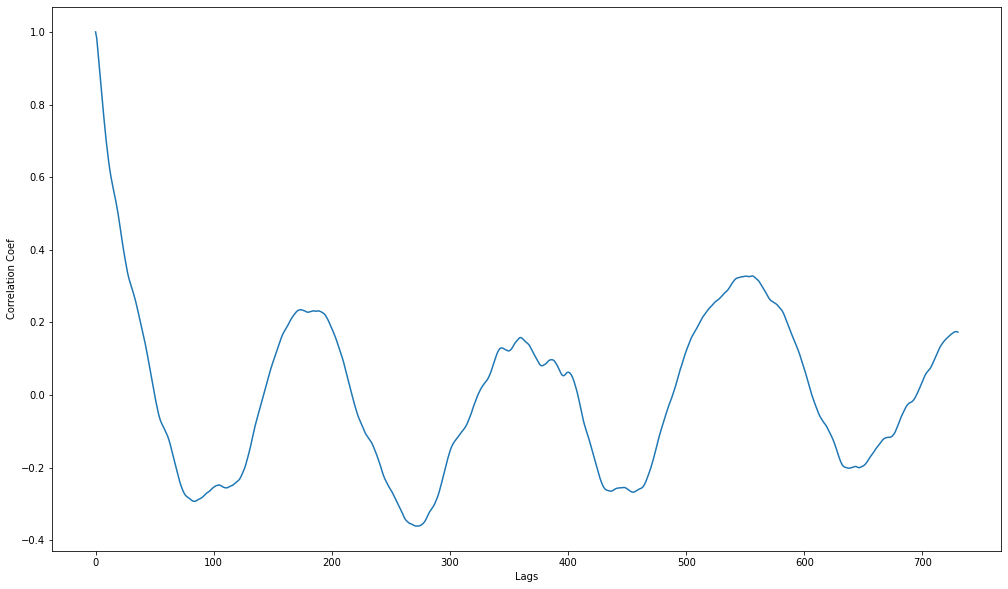

In [ ]:
from statsmodels.tsa.stattools import acf
acf_residuals = acf(residuals, nlags=730)
plt.figure(figsize=(17,10))
plot(acf_residuals)
xlabel("Lags")
ylabel("Correlation Coef")

**<font size=5><u>Comment:</u></font>**

The goal is to validate our fitting and visual validation is not enough therefore we calculate residuals and we check if they follow a **centred gaussian distribution** i.e noise, when plotting the residuals, we notice that they oscillate over the 0 line and are **equally distributed** between two sides (positive and negative), besides, the autocorrelation plot up to 730 lags starts from 1 and **decreases rapidly to around 0** which is close to a white noise autocorrelation's plot.

**=>** we **validate** the regression

**QUESTION 5**: Compute the SSH difference between the first day in 2011 and the last day in 2015 for each location in the globe. Then, plot the map of this SSH difference: it shows the sea level rise. Finally, adjust a regression to model the tendancy of the global mean sea level rise (averaged over all the location) and plot the prediction for the horizon 2100.

In [ ]:
%%bigquery --project alert-ground-261008 ssh_delta_map

SELECT first.lon, first.lat, first.ssh AS ssh_first, last.ssh AS ssh_last, last.ssh - first.ssh AS ssh_delta
FROM
  (SELECT lon, lat, ssh          
  FROM bdo2020.bdo2020.2011_2015 
  WHERE time = 734138) AS first 
INNER JOIN
  (SELECT lon, lat, ssh 
  FROM bdo2020.bdo2020.2011_2015 
  WHERE time = 735963) AS last 
ON ((last.lon = first.lon) AND (last.lat = first.lat));

In [ ]:
ssh_delta_map.head()

lon     lat  ssh_first  ssh_last  ssh_delta
0  328.625 -76.125    -1.4405   -1.3730     0.0675
1  328.375 -75.875    -1.4355   -1.3710     0.0645
2  329.125 -75.875    -1.4074   -1.3429     0.0645
3  331.625 -75.625    -1.3471   -1.3652    -0.0181
4  328.125 -75.125    -1.3819   -1.3085     0.0734

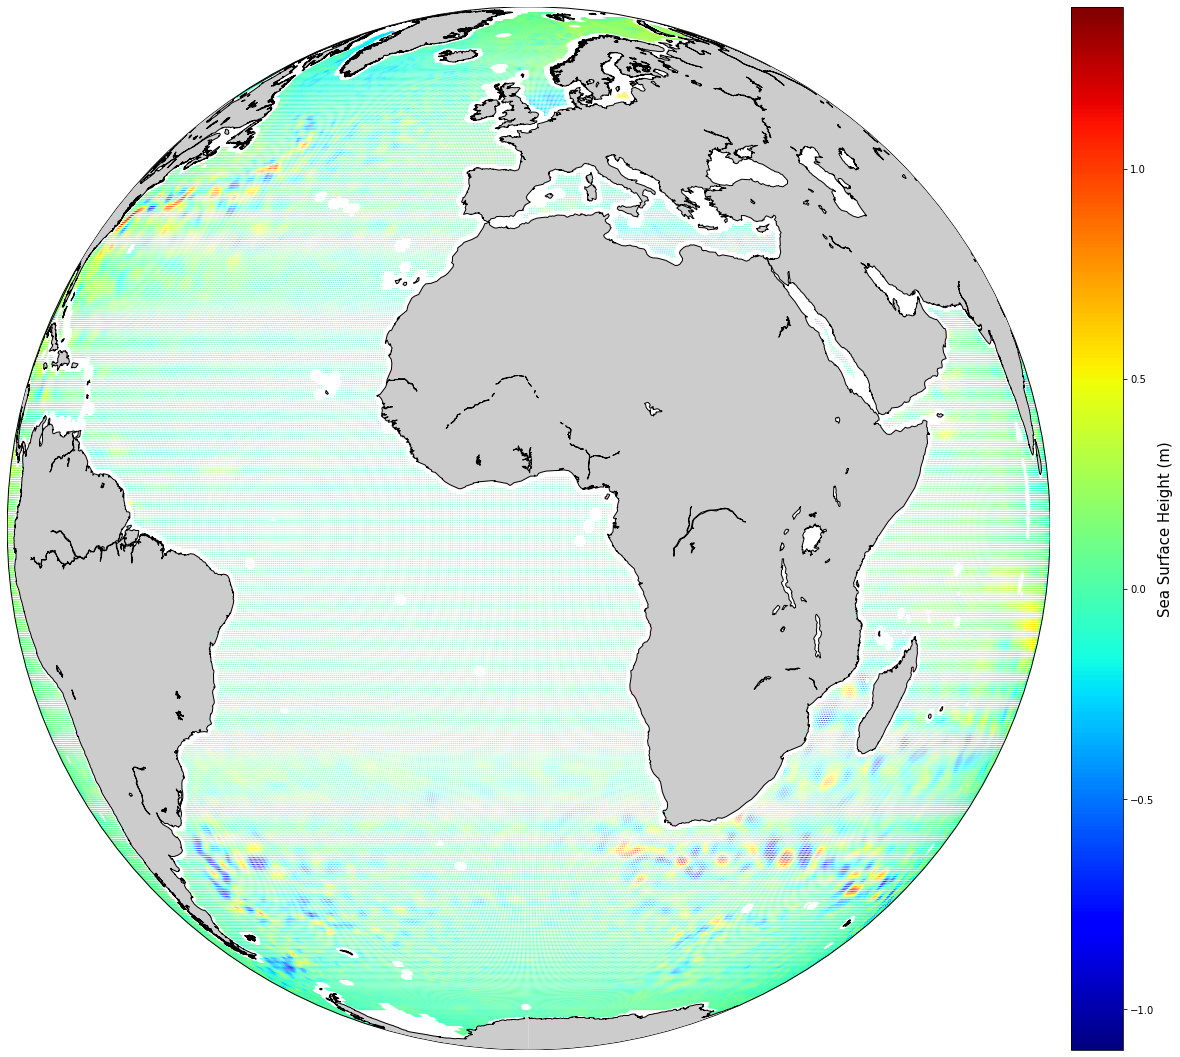

In [ ]:
plot_im(ssh_delta_map.lon, ssh_delta_map.lat, ssh_delta_map.ssh_delta,1,'Sea Surface Height (m)')

**<font size=5><u>Comment:</u></font>**

We notice a **rise** in the level of sea surface especially in **both poles**, this is generally due to **climate change** and **global warming** causing ice-lands to melt.
In addition, we notice an **important rise** in areas near the **coast** such as *South Africa, Argentina and United States* which might be due to **heavy human activity** in those areas (*Oil transportation*, ...)

In [ ]:
%%bigquery --project alert-ground-261008 ssh_rise_daily
SELECT time, AVG(ssh) AS ssh_global
FROM bdo2020.bdo2020.2011_2015
GROUP BY time
ORDER BY time

In [ ]:
#print data
ssh_rise_daily.head()

time  ssh_global
0  734138.0    0.310544
1  734139.0    0.309639
2  734140.0    0.307853
3  734141.0    0.307104
4  734142.0    0.305583

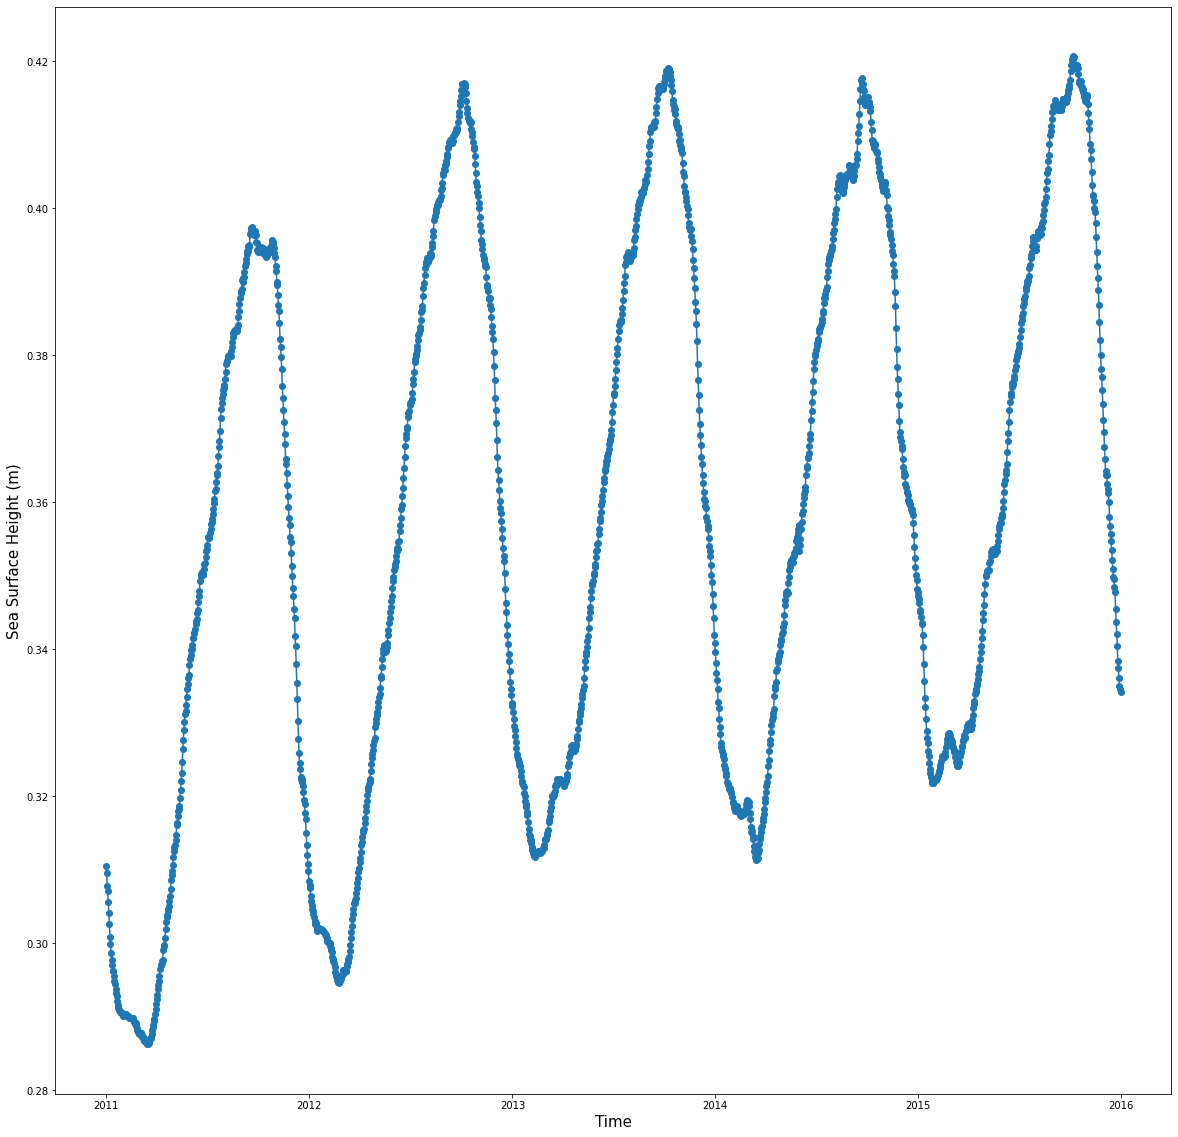

In [ ]:
plot_ts(ssh_rise_daily.time, ssh_rise_daily.ssh_global, "-o", 'Sea Surface Height (m)')

**<font size=5><u>Comment:</u></font>**

We can notice a rising tendancy in the plot above.

In [ ]:
time = ssh_rise_daily.time.values.reshape(-1,1)
ssh_global = ssh_rise_daily.ssh_global.values.reshape(-1,1)
reg = LinearRegression().fit(time, ssh_global)
print("SSH(t)= {} + {} * t ".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0]))

SSH(t)= -20.125222378751157 + 2.7866727696956553e-05 * t 


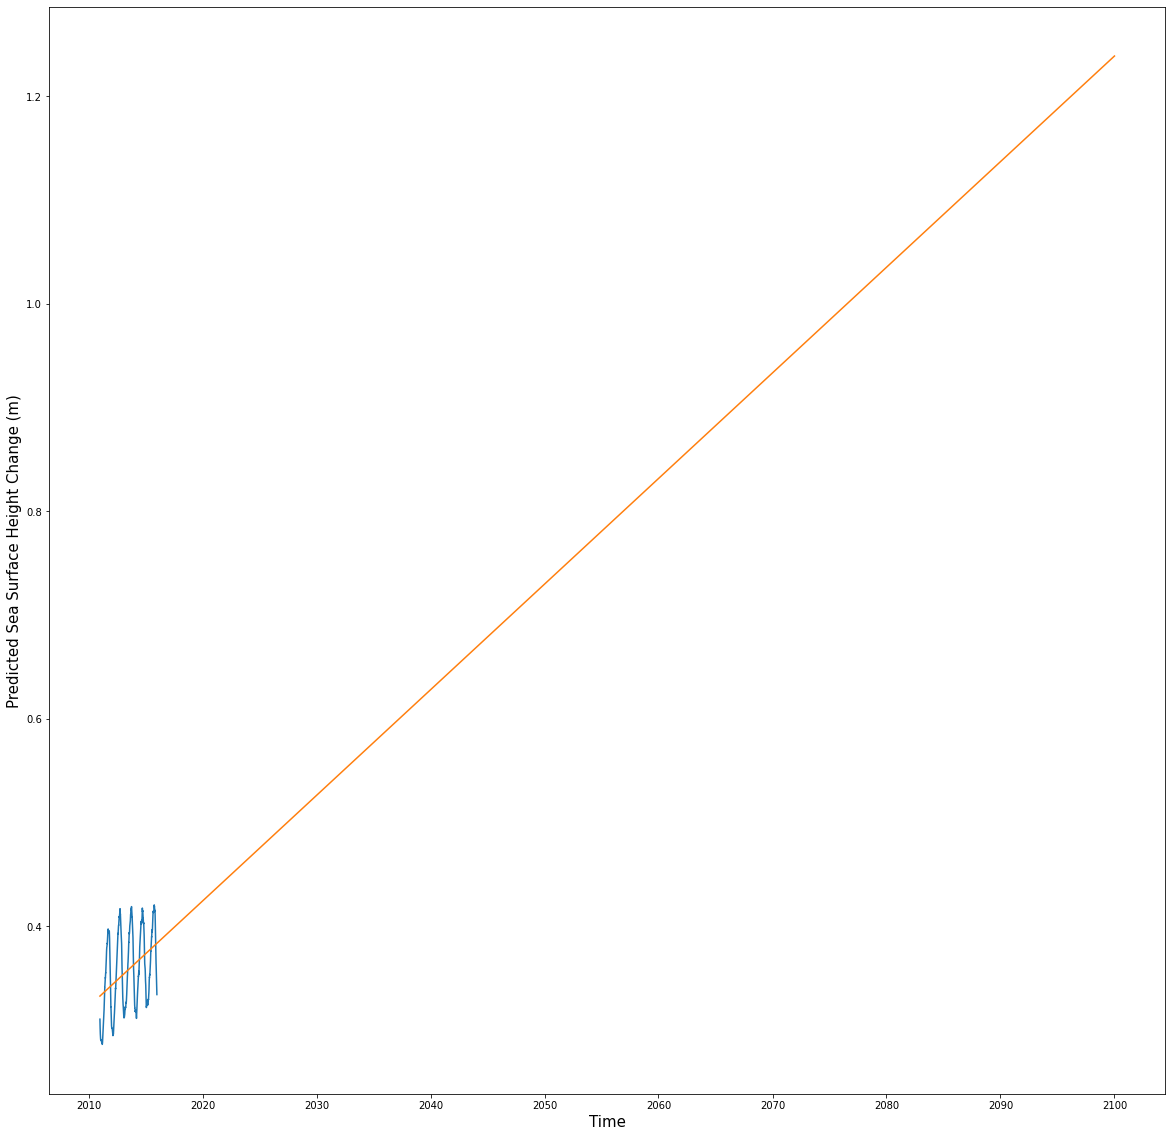

In [ ]:
#prepare future steps of prediction
HORIZON = "2100-01-01"
time_scale = np.array([min(ssh_rise_daily.time),  date2num(pd.datetime.strptime(HORIZON, '%Y-%m-%d'))]).reshape(-1,1)
#predict sea level tendancy
ssh_global_delta_predict = reg.predict(time_scale)
#plot both real data and prediction up till 2100
plot_ts(ssh_rise_daily.time, ssh_rise_daily.ssh_global, "-", "")
plot_ts(time_scale.ravel(), ssh_global_delta_predict.ravel(), "-", 'Predicted Sea Surface Height Change (m)' )

**<font size=5><u>Comment:</u></font>**

We notice that eventhough the slope of the fitted line is **close to 0**, the sea level prediction has reached **1.2 m in 2100** compared to **0.4 m at 2015**. In fact, such slow increase might have <font color="red">huge</font> impact on the planet.